PROBLEM STATEMENTS
---

Online Shopping Discount Impact Analysis 

● From: Minor 1 – Statistics 

● Extension: Analyze effect of discounts on sales volume. 

● Add-ons: Correlation analysis, plots. 

● Difficulty: Medium

---

IMPORT LIBRARIES

In [25]:
##### IMPORT LIBRARIES #####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
LOAD DATASETS

In [26]:
##### LOAD DATASETS #####
df=pd.read_csv("sales_data.csv")
df.head(5)


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


CALCULATION OF SELLING PRICE


In [27]:
#DISCOUNT AMOUNT
df["Discount_Price"]=df['Unit_Price']*(df['Discount']/100)
#SELLING PRICE AFTER DISCOUNT
df['Selling_Price']=df['Unit_Price']-df['Discount_Price']


---
DISCRIBING DATA AND STATISTICAL SUMMARY

In [28]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Discount_Price,Selling_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239,4.136817,2724.303303
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720,3.457299,1417.247160
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000,0.000000,167.053152
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000,1.322860,1506.955614
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000,3.086506,2691.417452
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000,6.247302,3948.478530
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000,15.782235,5426.367765


---
 DATA CLEANING

In [29]:
df=df[df['Sales_Channel']=='Online']
df.dropna(inplace=True)


---
SELECTING REQUIRED COLUMNS


In [30]:
df=df[["Product_Category","Quantity_Sold","Discount"]]
print(df)

    Product_Category  Quantity_Sold  Discount
0          Furniture             18      0.09
4        Electronics             13      0.08
5               Food             32      0.21
6          Furniture             29      0.14
7          Furniture             46      0.12
..               ...            ...       ...
993        Furniture             47      0.25
995             Food              4      0.29
997         Clothing             17      0.06
998      Electronics             39      0.01
999             Food             48      0.14

[488 rows x 3 columns]


---
CORRELATION ANALYSIS 

In [31]:
correlation=df["Discount"].corr(df["Quantity_Sold"])
print("CORRELATION BETWEEN DISCOUNT AND QUANTITY_SOLD:",correlation)

CORRELATION BETWEEN DISCOUNT AND QUANTITY_SOLD: -0.025688010687044523


---
CATEGORY WISE DISCOUNT USING PIE CHART

(np.float64(-1.099999943391099),
 np.float64(1.0999999973043382),
 np.float64(-1.0999999574289954),
 np.float64(1.0999996042502687))

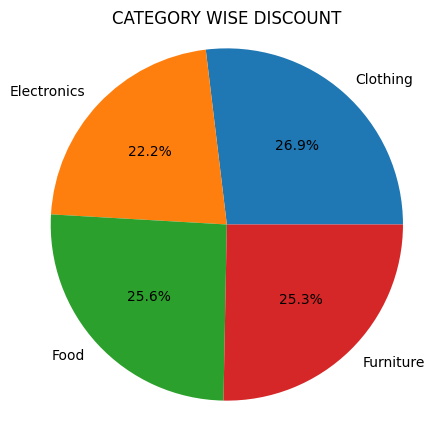

In [32]:
c=df.groupby('Product_Category')['Discount'].mean()
plt.figure(figsize=(5,5))
plt.pie(c,labels=c.index,autopct='%1.1f%%')
plt.title("CATEGORY WISE DISCOUNT")
plt.axis('equal')

---
QUANTITY SOLD AT DIFFERNT DISCOUNT LEVELS BY PRODUCT CATEGORY USING BAR PLOT

Text(0.5, 1.0, 'Quantity Sold at Differnt Discount Levels by Product Category')

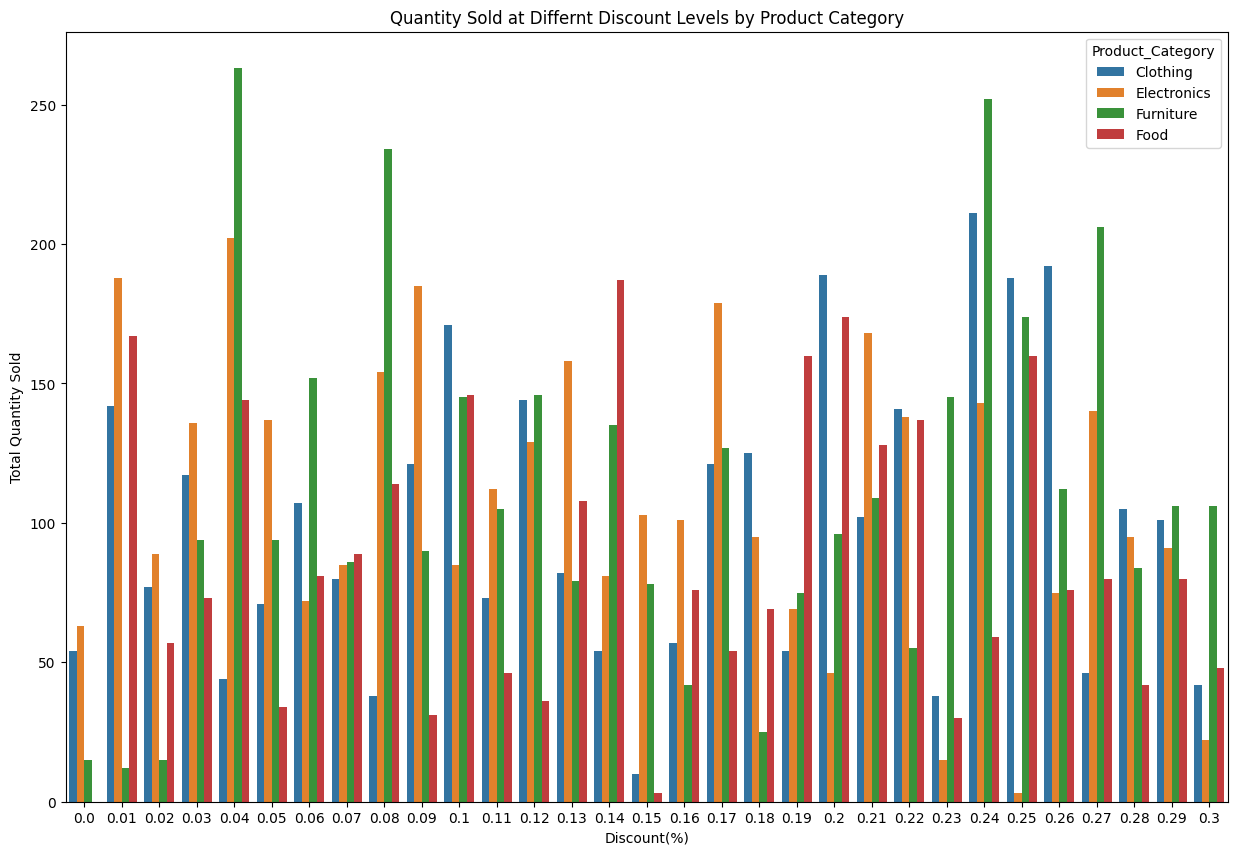

In [33]:
discount_category_qty=df.groupby(['Discount','Product_Category'],as_index=False)['Quantity_Sold'].sum()
plt.figure(figsize=(15,10))
sns.barplot(
    x='Discount',
    y='Quantity_Sold',
    hue='Product_Category',
    data=discount_category_qty
    )
plt.xlabel("Discount(%)")
plt.ylabel("Total Quantity Sold")
plt.title("Quantity Sold at Differnt Discount Levels by Product Category")

---
TREND OF QUANTITY SOLD WITH DISCOUNT(ONLINE SALES)

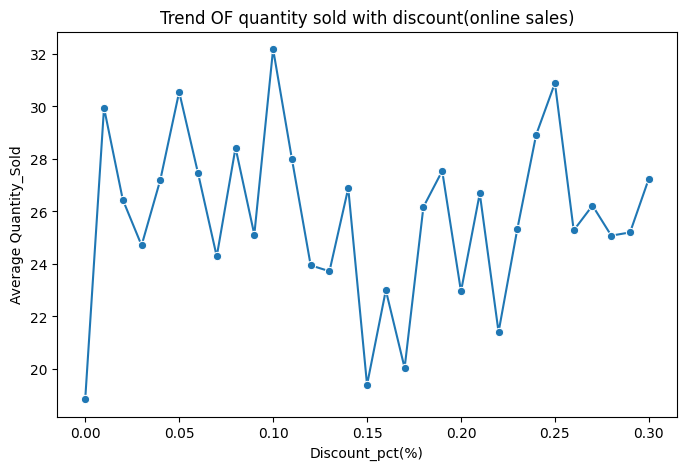

In [34]:
avg_df=df.groupby('Discount',as_index=False)['Quantity_Sold'].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x="Discount",y="Quantity_Sold",data=avg_df,marker='o')
plt.xlabel("Discount_pct(%)")
plt.ylabel("Average Quantity_Sold")
plt.title("Trend OF quantity sold with discount(online sales)")
plt.show()

---
RELATIONSHIP BETWEEN DISCOUNT AND QUANTITY SOLD USING SCATTER PLOT

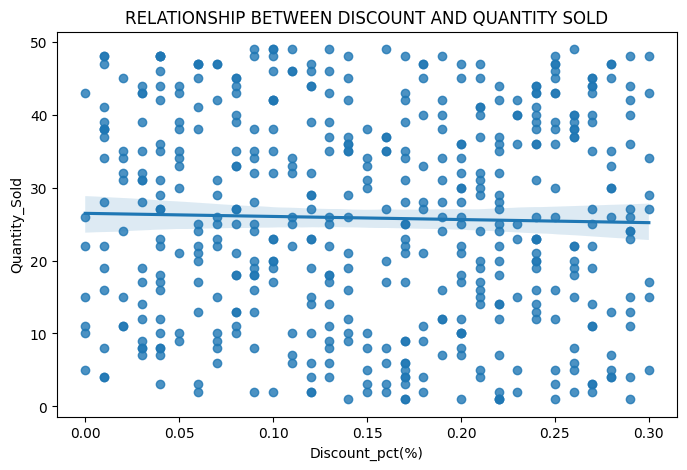

In [35]:
plt.figure(figsize=(8,5))
sns.regplot(x="Discount",y="Quantity_Sold",data=df)
plt.xlabel("Discount_pct(%)")
plt.ylabel("Quantity_Sold")
plt.title("RELATIONSHIP BETWEEN DISCOUNT AND QUANTITY SOLD")
plt.show()